# Assignment 9.2

In this assignment students will build the random forest model after normalizing the
variable to house pricing from boston data set.<br>
Following the code to get data into the environment:<br>
import numpy as np<br>
import pandas as pd<br>
import matplotlib.pyplot as plt<br>
import seaborn as sns<br>
from sklearn.model_selection import train_test_split<br>
from sklearn.preprocessing import StandardScaler<br>
from sklearn import datasets<br>
boston = datasets.load_boston()<br>
features = pd.DataFrame(boston.data, columns=boston.feature_names)<br>
targets = boston.target

<h2>Solution</h2>

<h3>Data Preperation</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

def get_target_class_vector(targets, n):
    tmin = targets.min()
    tmax = targets.max()
    arr = []
    for target in targets:
        for i in range(1,n+1):
            if (target - tmin) > i*(tmax-tmin)/n:
                continue
            else:
                arr.append(i-1)
                break
    return arr

def acc(y_pred,y_test):
    s = 0
    for i in range(0,len(y_pred)):
        if y_pred[i] == y_test[i]:
            s += 1
    return s/len(y_pred)

boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

scaler = StandardScaler()
print(scaler.fit(features))
features = pd.DataFrame(scaler.transform(features), columns=boston.feature_names)
print(features.head(3))

y = get_target_class_vector(targets, 5)

x_train,x_test, y_train, y_test = train_test_split(features,y,test_size=0.1)

xr_train,xr_test, yr_train, yr_test = train_test_split(features,targets,test_size=0.1)

print(xr_train.shape,xr_test.shape)

StandardScaler(copy=True, with_mean=True, with_std=True)
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.417713  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.415269 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.415272 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
(455, 13) (51, 13)


<h3>Data Visualization</h3>

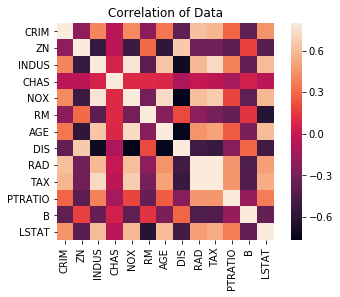

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
data_corr = features.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

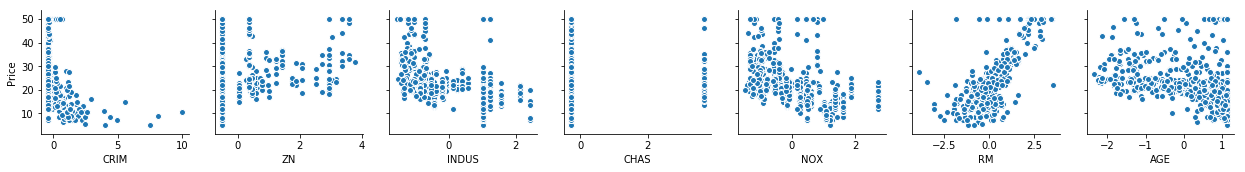

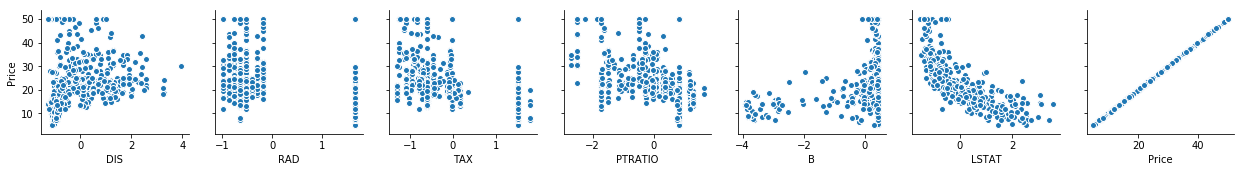

In [11]:
features['Price'] = targets
pp = sns.pairplot(data=features,y_vars=['Price'],x_vars=features.columns[:7])
plt.show()
pp = sns.pairplot(data=features,y_vars=['Price'],x_vars=features.columns[7:])
plt.show()
features = features.drop(columns=['Price'], axis = 1)


<h3>Training The Model(Random Forest)</h3>

<h4>Best Parameters</h4>

In [3]:

rfc = RandomForestClassifier(max_features=10, random_state=1)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("Random Forest Classifier Accuracy: ",acc(y_test, y_pred))

#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': [5, 10, 20, 30, 40], 'max_depth':[5,10,15],'max_features':[5,10,12]}]
clf = GridSearchCV(RandomForestRegressor(), parameters, scoring='neg_mean_squared_error')
clf.fit(xr_train, yr_train)

print("Best parameters for Regression are ",clf.best_params_)

Random Forest Classifier Accuracy:  0.8235294117647058
Best parameters for Regression are  {'max_features': 5, 'max_depth': 15, 'n_estimators': 40}


<h4>Training the Model</h4>

In [4]:
rfr = RandomForestRegressor(n_estimators=30, max_depth=10, max_features=5, random_state=1)
rfr.fit(xr_train, yr_train)
yr_pred = rfr.predict(xr_test)
print("Random Forest Regression Test Mean Squared Error: ",mean_squared_error(yr_test, yr_pred))
print("Random Forest Regression Predicted Values")
df = pd.DataFrame()
df['y_pred'] = yr_pred[:5]
df['y_test'] = yr_test[:5]
print(df)
print("The most important Feature is ",features.columns[np.argmax(rfr.feature_importances_,axis = 0)])


Random Forest Regression Test Mean Squared Error:  13.562936803350613
Random Forest Regression Predicted Values
      y_pred  y_test
0  26.260431    23.7
1  18.008433    17.5
2  28.203450    30.8
3  23.352191    23.1
4  20.958397    21.7
The most important Feature is  RM
